## Introduction 
Cohort analysis is a tool to measure user engagement over time. It helps to know whether user engagement is actually getting better over time or is only appearing to improve because of growth.

### phases:
1. Load data
2. Pre-processing
3. Analysis
4. Conclusion

### goals:
1. to find out whether over certain amount of time, the customer still buying the products or not

1. Load data

In [ ]:
import pandas as pd
import datetime as dt

In [ ]:
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


there are missing values in description column and customer ID column

2. Pre-Processing

erase the missing value

In [ ]:
df.dropna(inplace=True)

change the cust ID type into object

In [ ]:
df['CustomerID'] = df['CustomerID'].astype(int).astype(str)

In [ ]:
df.describe()

,Quantity,UnitPrice
count,406829.000000,406829.000000
mean,12.061303,3.460471
std,248.693370,69.315162
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


there are minus or negative data in Quantity which are not possible, so we are going to dig deeper

In [ ]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


the quantity column with minus data also contain letter C in the invoiceNo column

In [ ]:
df[df['InvoiceNo'].str.contains('C', na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


as we check invoiceNo data contain with the letter C also contain minus data in Quantity colums

In [ ]:
df[(df['Quantity']<0) & (df['InvoiceNo'].str.contains('C', na=False))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


as we check both columns, we found that the outliers are symetrical

let's drop them

In [ ]:
df = df[~(df['InvoiceNo'].str.contains('C', na=False))].reset_index(drop=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


3. Analysis

let's see the plot of the data

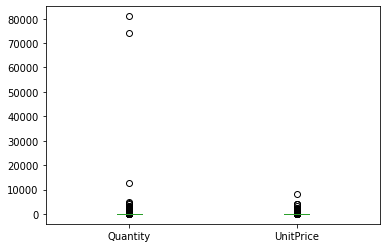

In [ ]:
df[['Quantity', 'UnitPrice']].plot(kind='box')

which country buys most product

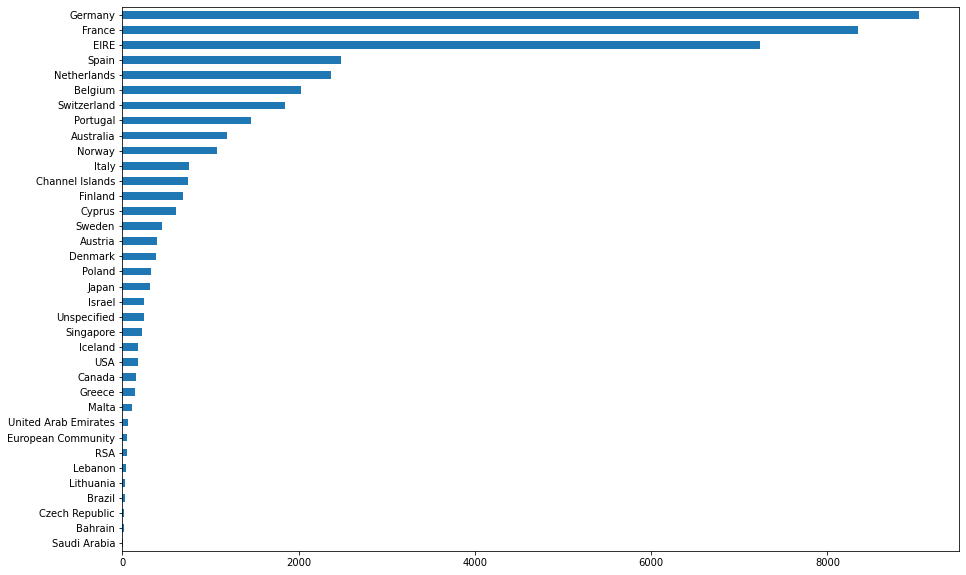

In [ ]:
df['Country'].value_counts()[1:].sort_values().plot(kind='barh', figsize=(15,10))

make sales column

In [ ]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

which country contributes to sales the most?

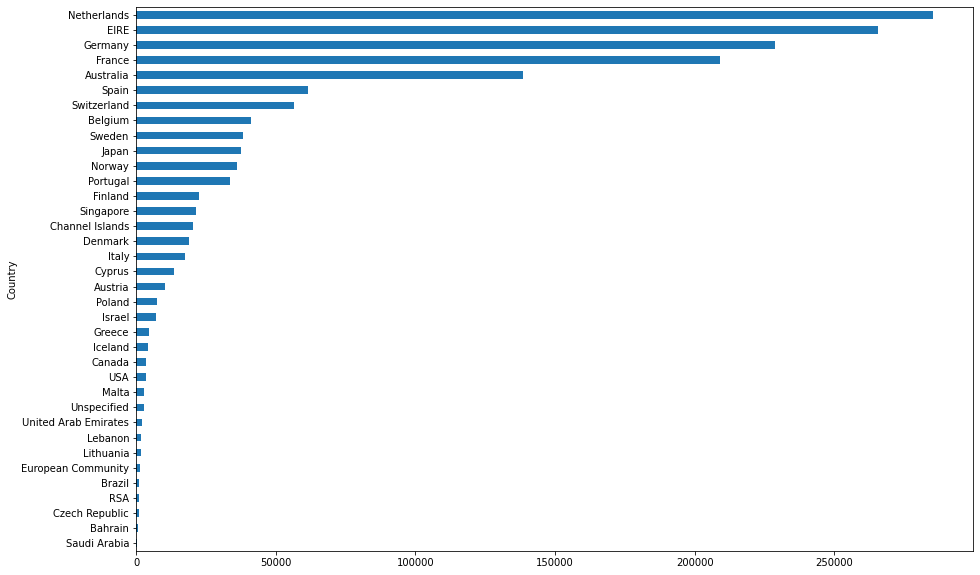

In [ ]:
df.groupby('Country')['Sales'].sum().sort_values()[:-1].plot(kind='barh', figsize=(15,10))

cohort analysis

find out the month from invoice

In [ ]:
df['InvoiceMonth'] = df['InvoiceDate'].apply(lambda x: dt.datetime(x.year, x.month, 1))

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01


find out the earliest time that the same cust bought products

In [ ]:
df.groupby('CustomerID')['InvoiceMonth'].transform('min')

0        2010-12-01
1        2010-12-01
2        2010-12-01
3        2010-12-01
4        2010-12-01
            ...    
397919   2011-08-01
397920   2011-08-01
397921   2011-08-01
397922   2011-08-01
397923   2011-08-01
Name: InvoiceMonth, Length: 397924, dtype: datetime64[ns]

make it into new column 

In [ ]:
df['CohortMonth'] = df.groupby('CustomerID')['InvoiceMonth'].transform('min')

In [ ]:
df.tail(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,InvoiceMonth,CohortMonth
397904,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804,United Kingdom,23.40,2011-12-01,2011-05-01
397905,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom,23.60,2011-12-01,2010-12-01
397906,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113,United Kingdom,30.00,2011-12-01,2010-12-01
397907,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113,United Kingdom,214.80,2011-12-01,2010-12-01
397908,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,7.08,13113,United Kingdom,70.80,2011-12-01,2010-12-01
397909,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680,France,23.40,2011-12-01,2011-08-01
397910,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France,19.80,2011-12-01,2011-08-01
397911,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France,19.80,2011-12-01,2011-08-01
397912,581587,22728,ALARM CLOCK BAKELIKE PINK,4,2011-12-09 12:50:00,3.75,12680,France,15.00,2011-12-01,2011-08-01
397913,581587,22727,ALARM CLOCK BAKELIKE RED,4,2011-12-09 12:50:00,3.75,12680,France,15.00,2011-12-01,2011-08-01


create a function to find the period of time that a cust buy a product

In [ ]:
def get_lifetime_indictor(row):
  y2 = row['InvoiceMonth'].year
  y1 = row['CohortMonth'].year
  m2 = row['InvoiceMonth'].month
  m1 = row['CohortMonth'].month
  li = (y2-y1)*12 + (m2-m1)
  return li

In [ ]:
df.apply(lambda x: get_lifetime_indictor(x), axis=1)

0         0
1         0
2         0
3         0
4         0
         ..
397919    4
397920    4
397921    4
397922    4
397923    4
Length: 397924, dtype: int64

create new column as the result of the period of time

In [ ]:
df['LifetimeIndicator'] = df.apply(lambda x: get_lifetime_indictor(x), axis=1)

In [ ]:
df.tail(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,InvoiceMonth,CohortMonth,LifetimeIndicator
397904,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804,United Kingdom,23.40,2011-12-01,2011-05-01,7
397905,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom,23.60,2011-12-01,2010-12-01,12
397906,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113,United Kingdom,30.00,2011-12-01,2010-12-01,12
397907,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113,United Kingdom,214.80,2011-12-01,2010-12-01,12
397908,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,7.08,13113,United Kingdom,70.80,2011-12-01,2010-12-01,12
397909,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680,France,23.40,2011-12-01,2011-08-01,4
397910,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France,19.80,2011-12-01,2011-08-01,4
397911,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France,19.80,2011-12-01,2011-08-01,4
397912,581587,22728,ALARM CLOCK BAKELIKE PINK,4,2011-12-09 12:50:00,3.75,12680,France,15.00,2011-12-01,2011-08-01,4
397913,581587,22727,ALARM CLOCK BAKELIKE RED,4,2011-12-09 12:50:00,3.75,12680,France,15.00,2011-12-01,2011-08-01,4


let's group them into new data frame to make it easier to analyse

In [ ]:
df.groupby(['CohortMonth', 'LifetimeIndicator'])['CustomerID'].nunique().reset_index()

,CohortMonth,LifetimeIndicator,CustomerID
0,2010-12-01,0,885
1,2010-12-01,1,324
2,2010-12-01,2,286
3,2010-12-01,3,340
4,2010-12-01,4,321
...,...,...,...
86,2011-10-01,1,86
87,2011-10-01,2,41
88,2011-11-01,0,324
89,2011-11-01,1,36


In [ ]:
cohort_agg = df.groupby(['CohortMonth', 'LifetimeIndicator'])['CustomerID'].nunique().reset_index()

pivot them 

In [ ]:
cohort = cohort_agg.pivot_table(index='CohortMonth',columns='LifetimeIndicator',values='CustomerID')
cohort

LifetimeIndicator,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cohort_size = df.groupby('CohortMonth')['CustomerID'].nunique()
cohort_size

CohortMonth
2010-12-01    885
2011-01-01    417
2011-02-01    380
2011-03-01    452
2011-04-01    300
2011-05-01    284
2011-06-01    242
2011-07-01    188
2011-08-01    169
2011-09-01    299
2011-10-01    358
2011-11-01    324
2011-12-01     41
Name: CustomerID, dtype: int64

find the retention or how long the cust buy a product and buy again

In [ ]:
retention = cohort.divide(cohort_size,axis=0)
retention

LifetimeIndicator,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
2011-01-01,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
2011-02-01,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
2011-03-01,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
2011-04-01,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


turn it into percentage

In [ ]:
retention.applymap(lambda x: '{:,.2%}'.format(x) if x == x else ' ')

LifetimeIndicator,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.00%,36.61%,32.32%,38.42%,36.27%,39.77%,36.27%,34.92%,35.37%,39.55%,37.40%,50.28%,26.55%
2011-01-01,100.00%,22.06%,26.62%,23.02%,32.13%,28.78%,24.70%,24.22%,29.98%,32.61%,36.45%,11.75%,
2011-02-01,100.00%,18.68%,18.68%,28.42%,27.11%,24.74%,25.26%,27.89%,24.74%,30.53%,6.84%,,
2011-03-01,100.00%,15.04%,25.22%,19.91%,22.35%,16.81%,26.77%,23.01%,27.88%,8.63%,,,
2011-04-01,100.00%,21.33%,20.33%,21.00%,19.67%,22.67%,21.67%,26.00%,7.33%,,,,
2011-05-01,100.00%,19.01%,17.25%,17.25%,20.77%,23.24%,26.41%,9.51%,,,,,
2011-06-01,100.00%,17.36%,15.70%,26.45%,23.14%,33.47%,9.50%,,,,,,
2011-07-01,100.00%,18.09%,20.74%,22.34%,27.13%,11.17%,,,,,,,
2011-08-01,100.00%,20.71%,24.85%,24.26%,12.43%,,,,,,,,


In [ ]:
(retention*100).style.background_gradient(axis=1).format(precision=1)

LifetimeIndicator,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01 00:00:00,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01-01 00:00:00,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,nan
2011-02-01 00:00:00,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,nan,nan
2011-03-01 00:00:00,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,nan,nan,nan
2011-04-01 00:00:00,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,nan,nan,nan,nan
2011-05-01 00:00:00,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.5,nan,nan,nan,nan,nan
2011-06-01 00:00:00,100.0,17.4,15.7,26.4,23.1,33.5,9.5,nan,nan,nan,nan,nan,nan
2011-07-01 00:00:00,100.0,18.1,20.7,22.3,27.1,11.2,nan,nan,nan,nan,nan,nan,nan
2011-08-01 00:00:00,100.0,20.7,24.9,24.3,12.4,nan,nan,nan,nan,nan,nan,nan,nan


show it in line chart

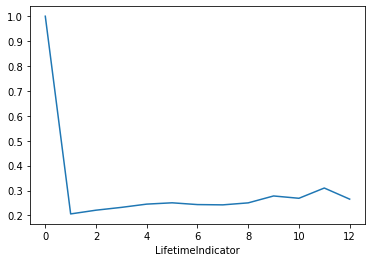

In [ ]:
retention.mean().plot()

4. conclusion:
customer retention doesn't look good because there is a big slump right after the first period of buying

